# Artificial Data

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math
from os.path import join as pjoin


In [72]:
# generate flashing square data
path = r'D:\Zhaoxi\mouse_vision\data\ICA2'

T1 = 20
T2 = 20
p=20
noise = 15
f1 = 2*math.pi/T1
f2 = 2*math.pi/T2
phase = (math.pi/2)*0.1*p
A1= 30
A2 =40
size = 25
frameNum = 624
# base=10
flashing_square = np.zeros((size,size,frameNum))
for i in range(frameNum):
    flashing_square[5:10,5:10,i] = A1*math.sin(f1*i) if math.sin(f1*i)>0 else 0
    flashing_square[8:13,8:13,i] = A2*math.sin(f2*i+phase) if math.sin(f2*i+phase)>0 else 0
    flashing_square[:,:,i] += np.random.normal(0,noise,(size,size))
    # flashing_square[50:70,50:70,i] = 20
np.save(pjoin(path, f'FS_{A1}_{A2}_{T1}_{T2}_{p}_{noise}_{size}x{size}pixel_{frameNum}frame.npy'),flashing_square)

# # 将flashing_square展平成2D
# flashing_square_2D = np.reshape(flashing_square,(size*size,frameNum))
# u,s,v = np.linalg.svd(flashing_square_2D)
# np.save(r'D:\Zhaoxi\mouse_vision\data\ICA\FS_'+f'{T1}_{T2}'+f'_0{p}_{noise}_U.npy',u)



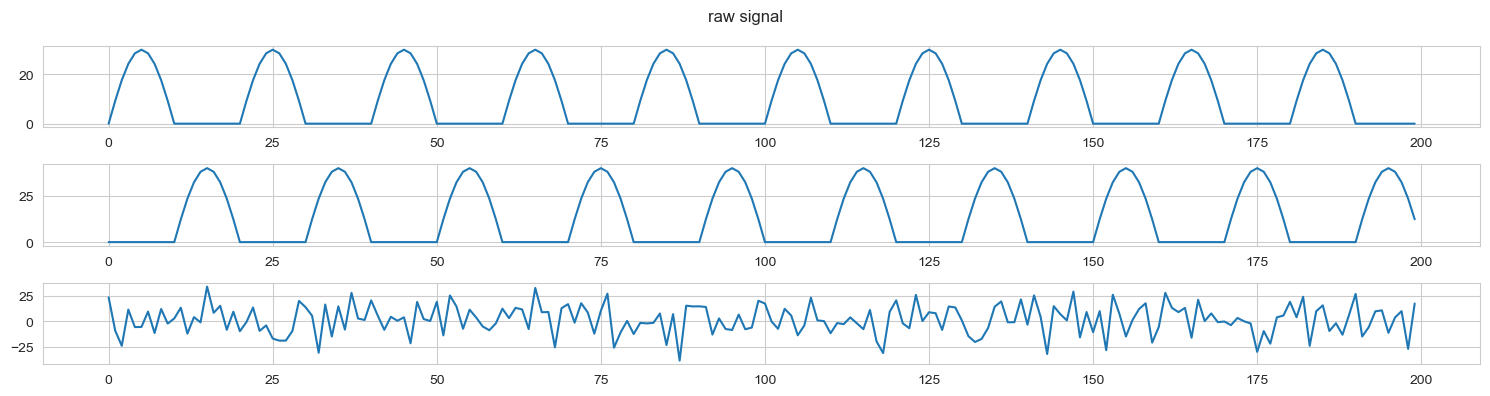

In [68]:
# plot raw signal

signal=np.zeros((3,frameNum))
for i in range(frameNum):
    signal[0,i] = A1*math.sin(f1*i) if math.sin(f1*i)>0 else 0
    signal[1,i] = A2*math.sin(f2*i+phase) if math.sin(f2*i+phase)>0 else 0
    signal[2,i] = np.random.normal(0,noise)
    
fig, axes = plt.subplots(3, 1, figsize=(15, 4))
for i in range(3):
    axes[i].plot(signal[i,:200])
plt.suptitle('raw signal')
plt.savefig(pjoin(path, 'raw signal.png'), bbox_inches='tight', pad_inches=0)
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

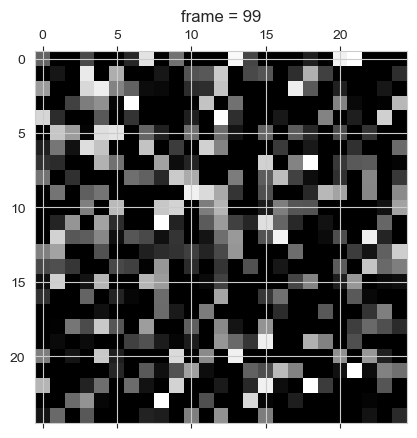

In [75]:
for i in range(100):
    # 设置颜色映射的范围为矩阵绝对值的最大最小值
    vmin, vmax = 0, 30
    # 使用Matplotlib绘制矩阵，根据绝对值设置颜色亮度
    plt.matshow(flashing_square[:,:,i], cmap='gray', vmin=vmin, vmax=vmax)  
    # plt.imshow(flashing_square[:,:,i])
    plt.title(f'frame = {i}')
    plt.show()
    plt.pause(0.15)
    clear_output(wait=True)

In [64]:
# fig = plt.figure(figsize = [15,6])
# for i in range(0,10):
#     fig.add_subplot(2,5,i+1)
#     u_pic = u[:,i].reshape((size,size))
#     plt.imshow(u_pic,cmap='gray')
# count = 0
# for i in range(300):
#     count += s[i]
#     if count/np.sum(s)>0.95:
#         print(i)
#         break

In [14]:
##generate coverd square data
T1 = 15
T2 = 20
p=0
noise = 5
f1 = 2*math.pi/T1
f2 = 2*math.pi/T2
phase = (math.pi/2)*0.1*p
size = 50
frameNum = 625
# base=10
cover_square = np.zeros((size,size,frameNum))
for i in range(frameNum):
        cover_square[5:15,5:15,i] = 20*math.sin(f1*i) if math.sin(f1*i)>0 else 0
        cover_square[10:20,10:20,i] += 20*math.sin(f2*i+phase) if math.sin(f2*i+phase)>0 else 0
for j in range(frameNum):
    cover_square[:,:,j] += np.random.normal(0,noise,(size,size))
np.save(r'D:\Zhaoxi\mouse_vision\data\ICA\CS_'+f'{T1}_{T2}'+f'_0{p}_{noise}.npy',cover_square)



In [15]:
# generate wave data
from numba import njit

@njit
def update_wave(wave):
    for i in range(frameNum):
        for j in range(size):
            for k in range(size):
                wave[j,k,i] = 20*math.sin(f1*i+k1*k) if math.sin(f1*i+k1*k)>0 else 0
                wave[j,k,i] += 20*math.sin(f2*i+k2*j+phase) if math.sin(f2*i+k2*j+phase)>0 else 0
        wave[:,:,i] += np.random.normal(0,noise,(size,size))
    return wave

In [16]:
#generate wave data

T1 = 10
T2 = 20
l1 = 5
l2 = 5
p=0
noise = 5
f1 = 2*math.pi/T1
f2 = 2*math.pi/T2
k1 = 2*math.pi/l1
k2 = 2*math.pi/l2
phase = (math.pi/2)*0.1*p
frameNum = 2500
size = 25
wave = np.zeros((size,size,frameNum))
wave = update_wave(wave)

np.save(r'D:\Zhaoxi\mouse_vision\data\ICA\Wave_'+f'{T1}_{T2}'+f'_0{p}_{noise}.npy',wave)

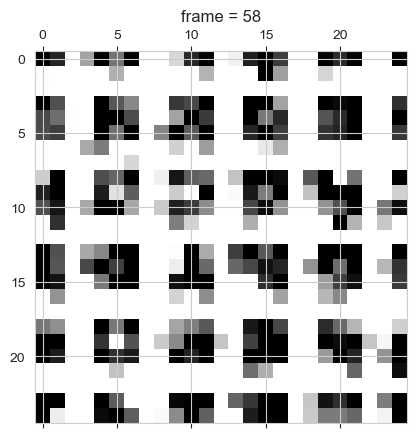

KeyboardInterrupt: 

In [17]:
import imageio
for i in range(300):
    # 设置颜色映射的范围为矩阵绝对值的最大最小值
    vmin, vmax = 0, 10
    # 使用Matplotlib绘制矩阵，根据绝对值设置颜色亮度
    plt.matshow(wave[:,:,i], cmap='gray', vmin=vmin, vmax=vmax)  
    # plt.imshow(flashing_square[:,:,i])
    plt.title(f'frame = {i}')
    plt.show()
    plt.pause(0.2)
    clear_output(wait=True)